### Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

#### **Abstract**

Explore Hotel aspects and Predict the rating of each review.

#### **About this dataset**

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!


#### **How to use**

* Predict Review Rating
* Topic Modeling on Reviews
* Explore key aspects that make hotels good or bad


#### **Acknowledgements**

**Citation**

Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223.


**License**

CC BY NC 4.0

**Splash banner**

Photo by Rhema Kallianpur on Unsplash.

**Splash icon**

Logo by Tripadvisor.


### Import pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import tensorflow as tf
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem.wordnet import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Data Loading

In [2]:
## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle` 
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download andrewmvd/trip-advisor-hotel-reviews

  0% 0.00/5.14M [00:00<?, ?B/s]
100% 5.14M/5.14M [00:00<00:00, 84.2MB/s]


In [4]:
!unzip ./trip-advisor-hotel-reviews.zip

Archive:  ./trip-advisor-hotel-reviews.zip
  inflating: tripadvisor_hotel_reviews.csv  


In [5]:
df_tripAdvisor = pd.read_csv('./tripadvisor_hotel_reviews.csv')
df_tripAdvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
# Check Missing Values 

df_tripAdvisor.isnull().sum()

Review    0
Rating    0
dtype: int64

No missing values in data

In [7]:
tripAdvisor_reviews = df_tripAdvisor.copy()

In [8]:
# Check ukuran data
tripAdvisor_reviews.shape

(20491, 2)

Data memiliki 20491 rows and 2 columns

In [9]:
# Melihat sample dari data column review
sample_reviews = tripAdvisor_reviews.loc[20000]['Review']

print(sample_reviews)

best hotel remember, booked hotel internet just going pictures reviews read site, glad did, hotel lovely modern tasteful excellently equipt clean, location n't perfect sites barcelona gaudi buildings museums shops bars resaurants catalyuna square litterally corner bus metro services bring ride away changes bus metro-line, extremely easy need holiday hotel staff helpful request needed emergency dental treatment receptionist boss got dentist straight away, impressive service excellent customer care.i not recommend hotel highly, schools door effects little, not issue hotel wonderful,  


### Data Cleaning

Di bagian Data Cleaning kita akan membersihkan text untuk digunakan sebagai data preprocessing, seperti mengubah text dari Uppercase menjadi lowercase, remove Hastag, remove Punctuation dan lain sebagainya

Kita ingin mengecek jumlah upper di setiap kata yang dimiliki pada setiap baris

In [10]:
# Uppercase
tripAdvisor_reviews['upper'] = tripAdvisor_reviews['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tripAdvisor_reviews[['Review','upper']].head()

,Review,upper
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


In [11]:
print("number of Uppercase: ", tripAdvisor_reviews['upper'].sum())

number of Uppercase:  23


Kita ingin mengecek jumlah Hastag di setiap kata yang dimiliki pada setiap baris

In [12]:
# Hastag
tripAdvisor_reviews['hastags'] = tripAdvisor_reviews['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tripAdvisor_reviews[['Review','hastags']].head()

,Review,hastags
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",0
4,"great stay great stay, went seahawk game aweso...",0


In [13]:
print("number of Hastags: ", tripAdvisor_reviews['hastags'].sum())

number of Hastags:  0


Kita ingin mengecek jumlah uppercase di setiap kata yang dimiliki pada setiap baris

In [14]:
# Punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

tripAdvisor_reviews['punctuation'] = tripAdvisor_reviews['Review'].apply(lambda x: count_punct(x))
tripAdvisor_reviews[['Review','punctuation']].tail()

,Review,punctuation
20486,"best kept secret 3rd time staying charm, not 5...",18
20487,great location price view hotel great quick pl...,5
20488,"ok just looks nice modern outside, desk staff ...",10
20489,hotel theft ruined vacation hotel opened sept ...,94
20490,"people talking, ca n't believe excellent ratin...",15


In [15]:
print("number of Punctuation: ", tripAdvisor_reviews['punctuation'].sum())

number of Punctuation:  357539


Kita ingin mengecek jumlah numerik di setiap kata yang dimiliki pada setiap baris

In [16]:
# Numbers / Digits
tripAdvisor_reviews['numerics'] = tripAdvisor_reviews['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tripAdvisor_reviews[['Review','numerics']].head()

,Review,numerics
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,6
2,nice rooms not 4* experience hotel monaco seat...,7
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",2


In [17]:
print("number of Numerics: ", tripAdvisor_reviews['numerics'].sum())

number of Numerics:  38610


In [18]:
# Method untuk cleaning data

def clean_data(data, name):
    # Convert words to lowercase
    data[name]=data[name].str.lower()
    # Remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+', '',x))
    # Remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub(r'@[^\s]+','',x))
    # Remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
    # Substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # remove text in square brackets
    data[name]=data[name].apply(lambda x:re.sub(r'\[.*?\]', '', x))
    # remove punctuation and remove words containing numbers
    data[name]=data[name].apply(lambda x:re.sub(r'[%s]' % re.escape(string.punctuation), '', x))
    # remove words containing numbers
    data[name]=data[name].apply(lambda x:re.sub(r'\w*\d\w*', '', x))
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    data[name]=data[name].apply(lambda x:re.sub(r'[‘’“”…]', '', x))
    data[name]=data[name].apply(lambda x:re.sub(r'\n', '', x))
    return data[name]

In [19]:
clean_data(tripAdvisor_reviews, 'Review')

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not  experience hotel monaco seattl...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret  time staying charm not  star...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside desk staff t...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca t believe excellent ratings ...
Name: Review, Length: 20491, dtype: object

Data sudah clean selanjutnya data ini kita akan gunakan pada data preprosessing

In [20]:
tripAdvisor_reviews = tripAdvisor_reviews[['Review',	'Rating']]

In [21]:
tripAdvisor_reviews.tail()

,Review,Rating
20486,best kept secret time staying charm not star...,5
20487,great location price view hotel great quick pl...,4
20488,ok just looks nice modern outside desk staff t...,2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,people talking ca t believe excellent ratings ...,2


### Eksplorasi Data

Kita akan melihat jumlah kata yang paling sering muncul pda dataset

In [22]:
reviews = tripAdvisor_reviews['Review']

# Sentence Tokenization

reviews_sentences = []
for review in reviews:
  
  sentences = sent_tokenize(review)
  reviews_sentences.append(sentences)

reviews_sentences[0]

['nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay  parking night']

In [23]:
words_token = []
for review in reviews:
  
  word_token = word_tokenize(review)
  words_token.extend(word_token)

words_token[0:10]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary']

Lima kata yang sering mucul pda dataset adalah:

In [24]:
fdist = FreqDist(words_token)
fdist.most_common(5)

[('hotel', 49820),
 ('room', 35332),
 ('not', 31710),
 ('great', 21475),
 ('t', 18742)]

Lima puluh kata yang sering mucul pda dataset bisa dilihat pada gambar dibawah ini:

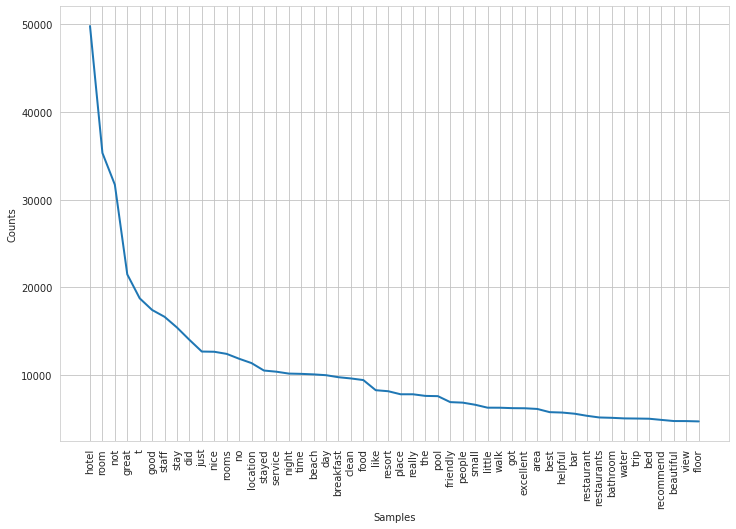

In [25]:
plt.figure(figsize=(12, 8))
fdist.plot(50, cumulative=False)
plt.show()

Untuk kata yang muncul kurang dari 10 pada dataset kita bisa lihat dibawah ini:

In [26]:
min_common = list(filter(lambda x: x[1]<=5,fdist.items()))
min_common[0:10]

[('bangs', 4),
 ('hood', 4),
 ('gee', 5),
 ('chating', 1),
 ('pillowsattentive', 1),
 ('staffnegatives', 1),
 ('brandi', 2),
 ('pattens', 1),
 ('palatte', 1),
 ('seahawk', 2)]

Kita juga bisa melihat kata dari yang paling sering muncul sampai dengan yang paling jarang muncul dengan wordCloud_generator

In [27]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()

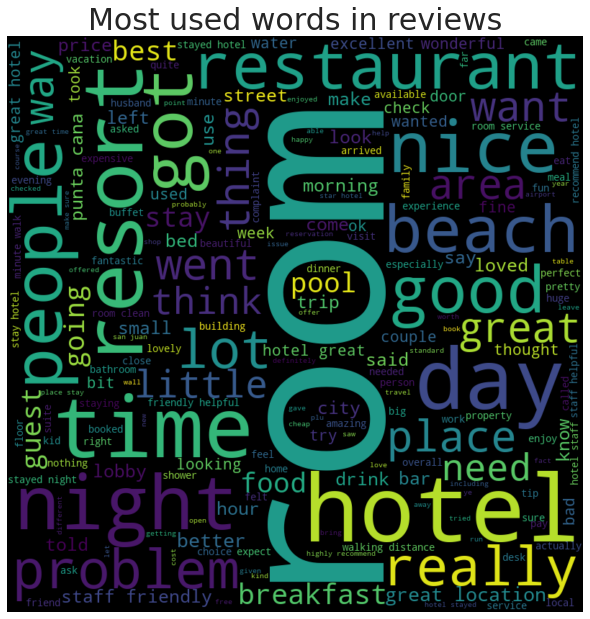

In [28]:
wordCloud_generator(tripAdvisor_reviews.Review, title="Most used words in reviews")

kata yang paling sering muncul sampai jarang muncul ditandai dengan ukuran kata itu senidri kata semakin besar maka kata tersebut semakin sering muncul begitu juga sebaliknya


Wordcloud diatas kata yang paling sering muncul adalah hotel, room, day, time, dan seterusnya secara berurutan

Text(0.5, 1.0, 'Ratings of Hotels')

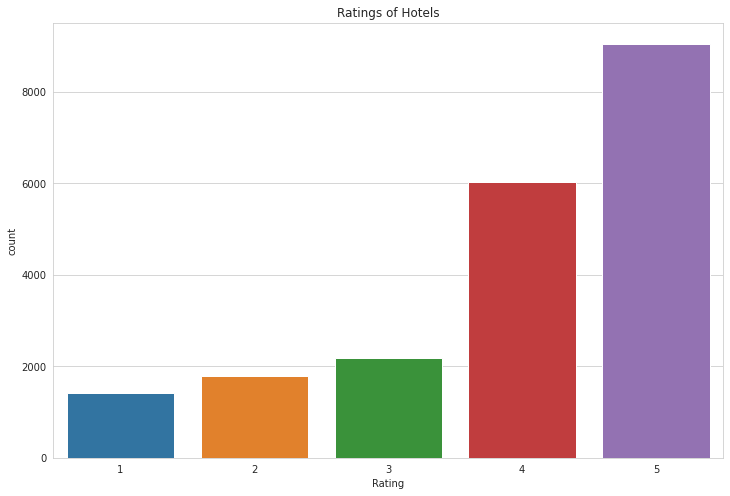

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(tripAdvisor_reviews["Rating"])
plt.title("Ratings of Hotels")

Dari grafik diatas paling banyak reviewes memberikan rating 5, kemudian rating 4 dan seterusnya. Dapat disimpulkan juga untuk kasus multiclass classification data adalah imbalanced

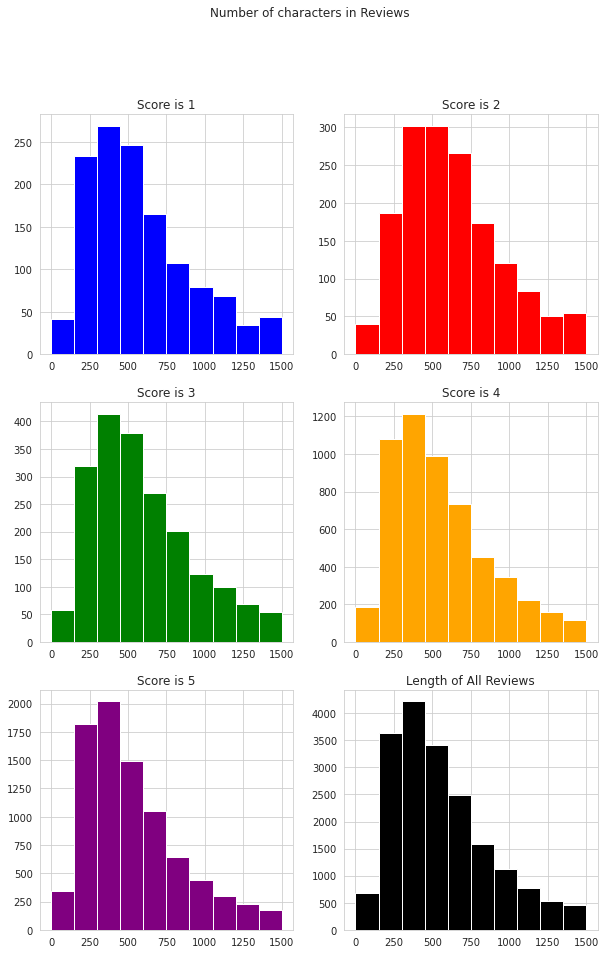

In [30]:
# Number of Characters in Reviews
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Score 1
review_len = tripAdvisor_reviews.loc[tripAdvisor_reviews['Rating']==1]['Review'].str.len()
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Score is 1')

#Score 2
review_len = tripAdvisor_reviews.loc[tripAdvisor_reviews['Rating']==2]['Review'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,1500))
axs[0,1].set_title('Score is 2')

#Score 3
review_len = tripAdvisor_reviews.loc[tripAdvisor_reviews['Rating']==3]['Review'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,1500))
axs[1,0].set_title('Score is 3')

#Score 4
review_len = tripAdvisor_reviews.loc[tripAdvisor_reviews['Rating']==4]['Review'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,1500))
axs[1,1].set_title('Score is 4')


#Score 5
review_len = tripAdvisor_reviews.loc[tripAdvisor_reviews['Rating']==5]['Review'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,1500))
axs[2,0].set_title('Score is 5')

#All Scores
review_len = tripAdvisor_reviews['Review'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,1500))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

Jumlah karakter pada setiap label memiliki distribusi yang sama

Kita juga bisa melihat sentiment reviewer antara positive (jika rating lebih dari sama dengan 4) dan negative (jika rating kurang dari sama dengan 3)

In [31]:
# Convert 5 Stars to Binary Value
tripAdvisor_reviews['Good_reviews'] = tripAdvisor_reviews.Rating
tripAdvisor_reviews.Good_reviews[tripAdvisor_reviews.Rating <= 3] = 0
tripAdvisor_reviews.Good_reviews[tripAdvisor_reviews.Rating >= 4] = 1

Text(0.5, 1.0, 'Distribution of Good Reviews')

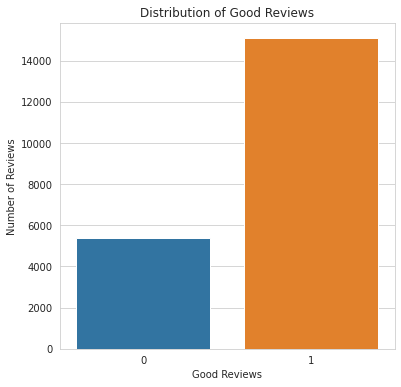

In [32]:
a = tripAdvisor_reviews.groupby(['Good_reviews']).count()
a = a.reset_index()

fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Good_reviews', y='Review', data=a)
plt.xlabel("Good Reviews")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Good Reviews')

Dari barplot tersebut dapat disimpulkan bahwa reviewer lebih banyak memiliki sentiment positive daripada negative

### Data Preprocessing

#### Stopwords

Kita akan menghapus stopword yang ada pada data

In [33]:
stop_words = set(stopwords.words("english"))

In [34]:
# Stopwords
tripAdvisor_reviews['stopwords'] = tripAdvisor_reviews['Review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
tripAdvisor_reviews[['Review','stopwords']].head()

,Review,stopwords
0,nice hotel expensive parking got good deal sta...,6
1,ok nothing special charge diamond member hilto...,16
2,nice rooms not experience hotel monaco seattl...,15
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,17


In [35]:
tripAdvisor_reviews['Review'] = tripAdvisor_reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
tripAdvisor_reviews['Review'].sample(10)

2945     best beach stayed bavaro princess suites march...
16742    fantastic hotel quieter area barcelona stayed ...
19652    contiki far away kuta hey got bali resort spen...
15628    flowers service birthday cake beijing month bi...
2428     hix want booked night stay hix house read revi...
8851     absolutely fabulous absolutely beautiful room ...
3091     beautiful resort trip report melia caribe roya...
16950    incredible wife went boston wedding anniversar...
7050     secrets average simply ok time nothing sorry n...
4461     wonderful staff planning trip paris friends lo...
Name: Review, dtype: object

#### Lemmatization

In [36]:
from nltk.tokenize import WhitespaceTokenizer

w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

tripAdvisor_reviews['Review']= tripAdvisor_reviews.Review.apply(lemmatize_text)

In [37]:
tripAdvisor_reviews['Review'].head()

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, room, experience, hotel, monaco, seattl...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [38]:
def lemmatize_output(text):
  return ' '.join([lemmatizer.lemmatize(w) for w in text])

tripAdvisor_reviews['Review']= tripAdvisor_reviews.Review.apply(lemmatize_output)
tripAdvisor_reviews['Review'].head()

0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object

In [39]:
tripAdvisor_reviews = tripAdvisor_reviews[['Review',	'Rating']]
tripAdvisor_reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room experience hotel monaco seattle good...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


Menghitung jumlah kata yang terdapat pada dataset

In [135]:
from collections import Counter
results = Counter()
tripAdvisor_reviews['Review'].str.lower().str.split().apply(results.update)
print(len(results))

45706


Terdapat 45706 kata yang ada pada data, selanjutnya kita dari data ini kita akan tentukan jumlah vocab yang akan digunakan untuk pendefinisian model

In [41]:
tripAdvisor_reviews['totalwords'] = [len(x.split()) for x in tripAdvisor_reviews['Review'].tolist()]

In [ ]:
tripAdvisor_reviews.describe()

,Rating,totalwords
count,20491.000000,20491.000000
mean,3.952223,97.720609
std,1.233030,93.551179
min,1.000000,6.000000
25%,3.000000,46.000000
50%,4.000000,72.000000
75%,5.000000,116.000000
max,5.000000,1855.000000


Totalkata pada setiap baris sangat berbeda signifikan dengan minimum jumlah kata 6 dan maksimum 1855 sedangkan rata-ratanya 97

In [42]:
tripAdvisor_reviews.to_csv('./data.csv', index=False)

In [114]:
data = pd.read_csv('./data.csv')
data.head()

,Review,Rating,totalwords
0,nice hotel expensive parking got good deal sta...,4,81
1,ok nothing special charge diamond member hilto...,2,229
2,nice room experience hotel monaco seattle good...,3,191
3,unique great stay wonderful time hotel monaco ...,5,84
4,great stay great stay went seahawk game awesom...,5,172


In [115]:
df = data.copy()
# reviews = df.iloc[:, :-1]
reviews = df['Review']
ratings = df['Rating']

In [116]:
from sklearn.model_selection import train_test_split

training_reviews, testing_reviews, training_ratings, testing_ratings = train_test_split(reviews, ratings, test_size=0.1, random_state=42, stratify=ratings.values)
training_reviews, val_reviews, training_ratings, val_ratings = train_test_split(training_reviews, training_ratings, test_size=0.1, random_state=42, stratify=training_ratings.values)

In [117]:
val_ratings

18890    4
18831    3
3956     4
5998     5
3104     5
        ..
2497     5
16623    4
13739    5
5930     4
17600    2
Name: Rating, Length: 1845, dtype: int64

In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [119]:
training_ratings = le.fit_transform(training_ratings)
val_ratings = le.transform(val_ratings)

In [120]:
val_ratings

array([3, 2, 3, ..., 4, 3, 1])

In [50]:
training_reviews.shape

(16596,)

In [51]:
training_reviews

9368     good location adult stayed night triple room l...
8986     maybe individual tale woe stayed april point p...
14002    great european hotel overall wife great stay h...
16501    true gem planning bali trip listened indonesia...
14550    great location average hotel great location cl...
                               ...                        
1111     perfect stay wonderful service received eduard...
541      wow marriott follower wife visited dallas frie...
12019    good better stayed time going regent hotel pro...
6913     nightmare holiday favourite holiday partner we...
12875    nice ambience good location tiny shower return...
Name: Review, Length: 16596, dtype: object

### Modelling Text Classification

Model yang akan kita gunakan terdiri dari Baseline model, Improvement model, dan Fine Tuning model.

Setiap model terdiri dari Pendefenisian model dan Pelatihan model

In [52]:
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [53]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)

In [54]:
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'day': 9,
 'good': 5,
 'great': 4,
 'hotel': 2,
 'night': 8,
 'room': 3,
 'staff': 6,
 'stay': 7,
 'time': 10}

In [55]:
train_sequences = tokenizer.texts_to_sequences(training_reviews)
print(train_sequences[10])

[39, 12, 679, 25, 343, 2, 189, 8, 1423, 1664, 127, 16, 8, 117, 1, 180, 8, 40, 275, 281, 1, 16, 163, 3, 87, 1, 1232, 1, 1797, 7024, 1324, 785, 81, 1861, 177, 2770, 780, 3275, 1080, 48, 35, 24, 52, 51, 6, 270, 38, 14, 1138, 1, 4, 20, 150, 5463, 774, 545, 116, 345, 137, 13, 165, 197, 304, 37, 102, 114, 1210, 304, 252, 11, 188]


In [56]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

87
100
122
100
71
100


In [57]:
validation_sequences = tokenizer.texts_to_sequences(val_reviews)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

1845
(1845, 100)


In [58]:
training_label_seq = np.array(training_ratings)
validation_label_seq = np.array(val_ratings)

In [59]:
np.shape(training_reviews)

(16596,)

#### Baseline Model

##### Pendefinisian Model

Baseline model kita ambil dari artikel berikut [ini](https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35) namun kita buat model nya dengan menggunakan ***Functional API***

In [60]:
from tensorflow import keras

def baseline_model():
  input_ = keras.layers.Input(1)
  embedding = keras.layers.Embedding(vocab_size, embedding_dim)(input_)
  bidirectional = keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim))(embedding)
  hidden1 = keras.layers.Dense(embedding_dim, activation='relu')(bidirectional)
  output = keras.layers.Dense(5, activation='softmax')(hidden1)
  model = keras.models.Model(inputs=[input_], outputs=[output])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [61]:
baseline_model = baseline_model()
baseline_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding (Embedding)       (None, 1, 64)             640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 714,629
Trainable params: 714,629
Non-trainable params: 0
_______________________________________________________

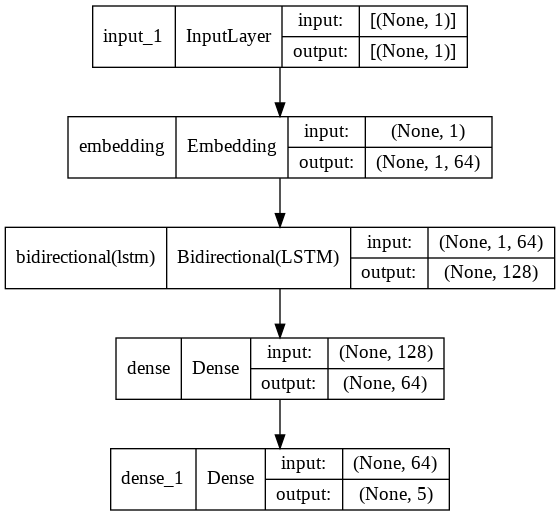

In [62]:
plot_model(baseline_model, "baseline_model.png", show_shapes=True)

##### Pelatihan Model

In [63]:
num_epochs = 10
history = baseline_model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=128)

Epoch 1/10
130/130 [==============================] - 16s 64ms/step - loss: 1.1520 - accuracy: 0.4968 - val_loss: 0.9144 - val_accuracy: 0.5973
Epoch 2/10
130/130 [==============================] - 7s 54ms/step - loss: 0.7964 - accuracy: 0.6443 - val_loss: 0.8507 - val_accuracy: 0.6228
Epoch 3/10
130/130 [==============================] - 7s 53ms/step - loss: 0.6761 - accuracy: 0.7085 - val_loss: 0.8808 - val_accuracy: 0.6206
Epoch 4/10
130/130 [==============================] - 7s 52ms/step - loss: 0.6019 - accuracy: 0.7489 - val_loss: 0.9370 - val_accuracy: 0.6238
Epoch 5/10
130/130 [==============================] - 7s 53ms/step - loss: 0.5303 - accuracy: 0.7877 - val_loss: 1.0110 - val_accuracy: 0.6168
Epoch 6/10
130/130 [==============================] - 6s 50ms/step - loss: 0.4713 - accuracy: 0.8156 - val_loss: 1.0925 - val_accuracy: 0.6016
Epoch 7/10
130/130 [==============================] - 6s 50ms/step - loss: 0.4113 - accuracy: 0.8432 - val_loss: 1.1995 - val_accuracy: 0.593

Dokumen [Embedding layer](http://man.hubwiz.com/docset/TensorFlow.docset/Contents/Resources/Documents/api_docs/python/tf/keras/layers/Embedding.html)

#### Evaluasi Model

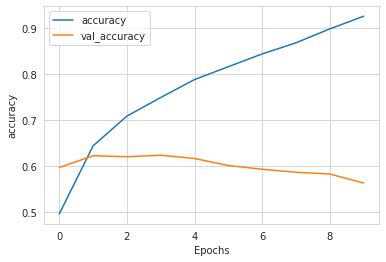

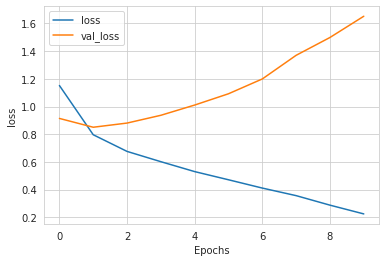

In [64]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Dari Baseline Model yang kita gunakan terlihat bahwa model tidak cukup baik dalam belajar. Hal ini dapat ditunjukkan Loss belum konvergen dan Val Loss yang semakin naik, dari hasil accuracy dapat disimpulkan bahwa model overfit artinya untuk kasus training memiliki akurasi sangat baik ditandai dengan tiap epoch akurasi mengalami peningkatan namun untuk data validasi akurasi mengalami penurunan. Selanjutnya kita akan lakukan improvement model dengan memperbaiki arsitektur.

Result:

loss: 0.2247 - accuracy: 0.9247 - val_loss: 1.6523 - val_accuracy: 0.5637

#### Model Improvement

Handling overfitting
Now, we can try to do something about the overfitting. There are different options to do that.

1. Reduce the network’s capacity by removing layers or reducing the number of elements in the hidden layers
2. Apply regularization, which comes down to adding a cost to the loss function for large weights
3. Use Dropout layers, which will randomly remove certain features by setting them to zero


[link text](https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e)

##### Pendefinisian Model

Kita lakukan Improvement model dengan menggunakan ***Sequential API***

In [65]:
def model_rnn():
  model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, 
                                                       return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                             tf.keras.layers.Dense(128,kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                                                   bias_regularizer = tf.keras.regularizers.l2(0.01),
                                                   activation='LeakyReLU'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(64, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                                                   bias_regularizer  = tf.keras.regularizers.l2(0.01),
                                                   activation='elu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(32, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.l2(0.1),
                                                   activation='relu'),
                             tf.keras.layers.Dense(5, activation='softmax')
                             ])
  
  
  opt = tf.keras.optimizers.Nadam(lr=0.0001, clipvalue=1.0)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  
  return model

Penjelasan Model:
1. Embedding Layer: It requires that the input data be integer encoded, so that each word is represented by a unique integer
2. Bidirectional LSTM: The process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future)
3. Jumlah Node pada hidden layer pertama adalah 128, kemudian Hidden layer kedua 64, dan Hidden layer ke tiga 32.
4. Weight Inizialition digunakan untuk mengatur weight pada Neural Network ke small random values. Karena kita menggunakan fungsi aktivasinya adalah grup dari Relu maka kita gunakan Weight Inizialition adalah He
5. Batch Normalization digunakan untuk scaling dan pembatasan input pada setiap batch
6. Drop Out=0.5 artinya sebanyak 50 persen node pada hidden layer diaknonatifkan secara random yang digunakan untuk mengurangi overfit
7. Output 5 hidden layer karena multiclass dan menggunakan fungsi aktifasi softmax
8. Regularizers: Allow you to apply penalties on layer parameters or layer activity during optimization.
9. Optimizer menggunakan Nadam
10. loss nya kita gunakan sparse_categorical_crossentropy karena multiclass
11. metrics nya kita gunakan accuracy sebagai initial dari model berjalan dengan baik


In [66]:
model_rnn = model_rnn()
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 512)         657408    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              5

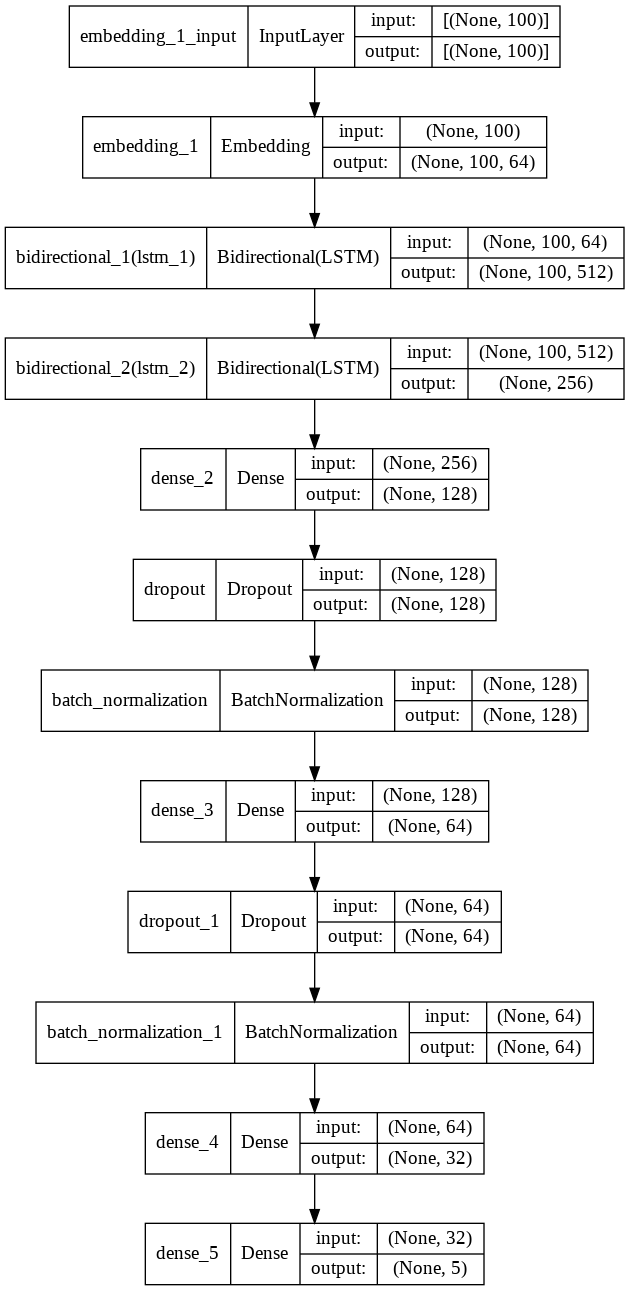

In [67]:
plot_model(model_rnn, "model_rnn.png", show_shapes=True)

Penjelasan Model:


https://medium.com/analytics-vidhya/author-multi-class-text-classification-using-bidirectional-lstm-keras-c9a533a1cc4a

##### Pelatihan Model

In [68]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
checkpoint_filepath = './checkpoint_model'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

num_epochs = 30
history = model_rnn.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), batch_size=100, callbacks=[callback, reduce_lr, model_checkpoint])

Epoch 1/30
166/166 [==============================] - 56s 208ms/step - loss: 41.4904 - accuracy: 0.3697 - val_loss: 36.8555 - val_accuracy: 0.4612 - lr: 1.0000e-04
Epoch 2/30
166/166 [==============================] - 28s 169ms/step - loss: 32.7008 - accuracy: 0.4455 - val_loss: 29.1402 - val_accuracy: 0.5187 - lr: 1.0000e-04
Epoch 3/30
166/166 [==============================] - 28s 168ms/step - loss: 25.7538 - accuracy: 0.5091 - val_loss: 22.9019 - val_accuracy: 0.5415 - lr: 1.0000e-04
Epoch 4/30
166/166 [==============================] - 28s 168ms/step - loss: 20.3183 - accuracy: 0.5459 - val_loss: 18.0609 - val_accuracy: 0.5810 - lr: 1.0000e-04
Epoch 5/30
166/166 [==============================] - 28s 168ms/step - loss: 16.0462 - accuracy: 0.5830 - val_loss: 14.2884 - val_accuracy: 0.5924 - lr: 1.0000e-04
Epoch 6/30
166/166 [==============================] - 28s 167ms/step - loss: 12.7011 - accuracy: 0.6085 - val_loss: 11.3581 - val_accuracy: 0.5837 - lr: 1.0000e-04
Epoch 7/30
166/1

Kita tambahkan fungsi callback yang terdiri dari:
1. Early Stopping digunakan untuk memberhentikan training model ketika pada val_loss yang harusnya konvergen atau menurun namun mengalami kenaikan pada setiap epoch 
2. ReduceLROnPlateau untuk mengatur learning rate mencapai loss yang optimum
3. model_checkpoint menyimpan model dengan val_accuracy yang terbaik


In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

https://www.tensorflow.org/guide/keras/train_and_evaluate

#### Evaluasi Model

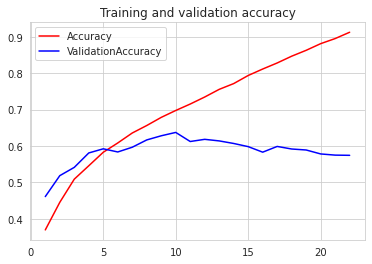

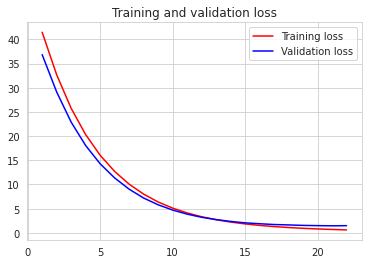

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Accuracy')
plt.plot(epochs, val_acc, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

Hasil Improvement Model menunjukkan untuk Loss dan Val_Loss hasilnya konvergen pada epoch ke-22 artinya hingga epoch ke-22 model dapat belajar dengan baik. Nilai Accuracy semakin tinggi berbanding terbalik dengan Validation Accuracy setelah epoch ke-10 nilainya semakin menurun.
Hal-hal yang perlu diperhatikan disini adalah data yang kita gunakan adalah imbalanced dan jumlah kata pada setiap input data berbeda sangat signifikan itu bisa ditunjukkan dari perhitungan totalword dengan nilai minimum kata pada setiap baris adala 6 sedangkan maximum nya adalah 1855 dan rata-ratanya kata pada setiap baris adalah 97.

Result

loss: 0.6047 - accuracy: 0.9124 - val_loss: 1.4831 - val_accuracy: 0.5745

#### Fine Tuning

##### Pendefinisian Model

Kita lakukan Improvement model yang kedua dengan Fine Tuning [DistilBert](https://huggingface.co/docs/transformers/model_doc/distilbert) dengan menggunakan **PIPELINE**

In [71]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-ie8bkx_e
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-ie8bkx_e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 5.3 MB/s 
     |████████████████████████████████| 6.8 MB 44.3 MB/s 
     |████████████████████████████████| 895 kB 47.0 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
  Created wheel for transformers: filename=transformers-4.17.0.dev0-py3-none-any.whl size=3608283 sha256=cb8cc6ccb5b8e54ab2c8cba46e52e248816729e72f9df41070caefd5eb5b9b85
  Stored in directory: /tmp/pip-ephem-wheel-cache-3vtykys8/wheels/90/a5/44/6bcd83827c8a60628c5ad602f429cd5076bcce5f2a90054947
Successfully built transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfu

In [72]:
# import Library
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import json
import gc

In [123]:
# Merubah dataframe ke dalam bentuk list
training_reviews = training_reviews.to_list()
val_reviews = val_reviews.to_list()

In [124]:

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(training_reviews, truncation=True, padding=True)
val_encodings = tokenizer(val_reviews, truncation=True, padding=True)

In [125]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_ratings
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_ratings
))

In [126]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_101', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

In [127]:
history = model.fit(train_dataset.shuffle(1000).batch(16), epochs=3, batch_size=16,
          validation_data=val_dataset.shuffle(1000).batch(16))

Epoch 1/3
1038/1038 [==============================] - 1808s 2s/step - loss: 0.9000 - accuracy: 0.6044 - val_loss: 0.9109 - val_accuracy: 0.6125
Epoch 2/3
1038/1038 [==============================] - 1792s 2s/step - loss: 0.7128 - accuracy: 0.6905 - val_loss: 0.7930 - val_accuracy: 0.6553
Epoch 3/3
1038/1038 [==============================] - 1796s 2s/step - loss: 0.5679 - accuracy: 0.7644 - val_loss: 0.9129 - val_accuracy: 0.6098


In [129]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

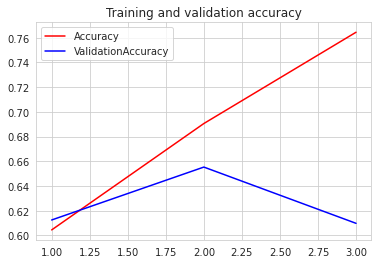

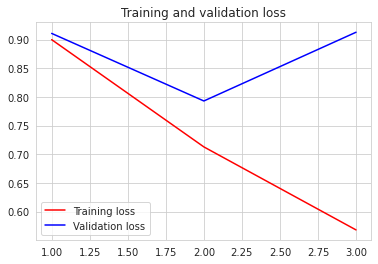

In [130]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Accuracy')
plt.plot(epochs, val_acc, 'blue', label='ValidationAccuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

Dari hasil model fine tuning dengan 3 Epoch val loss mengalami peningkatan dari 0.79 ke 0.91 sedangkan val_accuracy mengalami penurunan dari 0.5 ke 0.61. Hasil ini menunjukkan bahwa kesimpulan smenetara model kurang dapat belajar dengan baik namun karena hanya 3 epoch kita perlu melakukan eksplorasi lebih lanjut contohnya dengan menambah jumlah epoch dan lain sebagainya

https://towardsdatascience.com/build-better-pipelines-with-tensorflow-dataset-328932b16d56

#### Evaluasi Model

### Model Saving

In [73]:
MODEL_PATH = "./tf_model"
model_rnn.save(MODEL_PATH)

INFO:tensorflow:Assets written to: ./tf_model/assets


INFO:tensorflow:Assets written to: ./tf_model/assets


In [74]:
# zip hasil model
!zip -r /content/file.zip /content/tf_model

  adding: content/tf_model/ (stored 0%)
  adding: content/tf_model/assets/ (stored 0%)
  adding: content/tf_model/keras_metadata.pb (deflated 93%)
  adding: content/tf_model/saved_model.pb (deflated 90%)
  adding: content/tf_model/variables/ (stored 0%)
  adding: content/tf_model/variables/variables.index (deflated 71%)
  adding: content/tf_model/variables/variables.data-00000-of-00001 (deflated 7%)


In [75]:
model_final = tf.keras.models.load_model(MODEL_PATH)

### Model Inference

In [76]:
testing_reviews = testing_reviews.to_list()

In [77]:
testing_reviews[0:5]

['great stay return night day stay overall excellent break want relax lay pool beach place want party try resort exchange privilege property casino disco party foodaverage propertynice cleanroomnice floor vault ceiling nice touch rain staffvery helpful',
 'fine came good hotel pretty period theme nicely situated edge chinatown walking distance little italy east village staff attentive stay pleasant continental breakfast enjoyable overall atmosphere positive bad travelled business booked hotel guest separate room based somewhat affordable room rate night told cancellation reservation hour advance notified stay ended early charged room rental remaining night consequently business concluded early forced pay roughty cost stay experience large ny hotel host business traveller manager nice point refused compromise unlikely stay hotel recommend traveler fact given personal attention manager owner based review probably invited hotel',
 'deluxe accomodations heart amsterdam good price great loc

In [78]:
test_sequences = tokenizer.texts_to_sequences(testing_reviews)
print(test_sequences[10])

[259, 16, 8, 164, 300, 452, 87, 764, 160, 432, 190, 1068, 6427, 3, 985, 7777, 41, 174, 1040, 4252, 253, 17, 1220, 1126, 1224, 6, 27, 38]


In [79]:
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(test_sequences))
print(test_padded.shape)

2050
(2050, 100)


In [82]:
test_padded

array([[   4,    7,  143, ...,    0,    0,    0],
       [ 178,  186,    5, ...,    0,    0,    0],
       [ 741, 1477,  641, ...,  283, 1149, 2070],
       ...,
       [  87,    2,   91, ...,    0,    0,    0],
       [  29,  206, 1352, ...,    0,    0,    0],
       [ 355,    5, 2403, ...,  490,   15,  811]], dtype=int32)

In [83]:
predict_ratings = model_final.predict(test_padded)

In [87]:
predict_ratings

array([[0.00782151, 0.00832124, 0.01390384, 0.32962468, 0.6403287 ],
       [0.07041969, 0.6401142 , 0.24529307, 0.03168322, 0.0124899 ],
       [0.01492968, 0.05282479, 0.40625596, 0.47439966, 0.05158992],
       ...,
       [0.00485297, 0.01169604, 0.10216092, 0.84751904, 0.03377101],
       [0.00654033, 0.00720003, 0.00830512, 0.05762197, 0.9203325 ],
       [0.00199593, 0.04282769, 0.91053385, 0.04236681, 0.00227576]],
      dtype=float32)

In [95]:
predict_ratings_list = []
for rate in predict_ratings:
  #print(rate)
  predict_ratings_list.append(np.argmax(rate)+1) # ditambah 1 karena pada data train dilakukan encoding [0, 1, 2, 3, 4]

In [101]:
#make dataframe for comparing the orignal and predict values
data_test_predict = {'orignal': testing_ratings, 'predicted':predict_ratings_list}
df_check = pd.DataFrame(data_test_predict)
df_check.head(10)

,orignal,predicted
16778,5,5
19314,2,2
9073,5,4
18377,3,3
12241,5,5
12719,5,5
1769,5,5
17081,3,5
6874,5,3
7694,5,5


### Evaluasi Metrics 

              precision    recall  f1-score   support

           1       0.62      0.59      0.61       142
           2       0.35      0.31      0.33       179
           3       0.35      0.36      0.35       219
           4       0.47      0.46      0.46       604
           5       0.70      0.73      0.72       906

    accuracy                           0.56      2050
   macro avg       0.50      0.49      0.49      2050
weighted avg       0.56      0.56      0.56      2050



Text(132.0, 0.5, 'True_number')

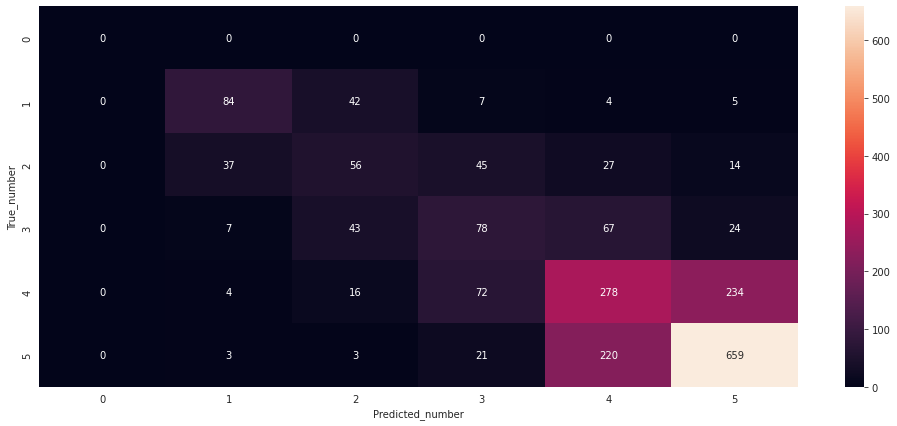

In [102]:
import seaborn as sns

# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(testing_ratings,predict_ratings_list))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=testing_ratings,predictions=predict_ratings_list)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

Untuk kasus multiclass saat ini kita gunakan metrics f1-score, dapat dilihat f1-score dapat diurutkan dari yang paling tinggi ke yang paling rendah adalah Rating 5, Rating 1, Rating 4, Rating 3, dan Rating 2.

Rating 5 memiliki jumlah data paling tinggi sedangkan Rating 1 memiliki jumlah data yang paling rendah. 

### Pengambilan Kesimpulan

1. Data terdiri dari 5 class yaitu terdiri dari rating 1 sampai rating 5, hasil dari eksplorasi data menunjukkan bahwa data imbalance dan jumlah kata pada setiap data sangat berbeda signifikan dengan nilai minimum 6 kata, maximum 1855 sedangakan rata-rata pada setiap kata 97 hal ini sangat berpegaruh pada accuracy pada model.
2. Hasil Improvement model menunjukkan model dapat belajar lebih baik daripada baseline model, namun untuk val accuracy semakin menurun ini dimungkingkan karena data nya imblanced dan totalword yang berbeda cukup signifikan.
3. Dari ketiga model yaitu baseline model, LSTM model dan Fine Tuning model, Model yang akan kita gunakan adalah LSTM Model alasannya loss model konvergen.
4. Model cukup baik belajar data yang yang memiliki Rating 5 dan Rating 1 meskipun data imbalanced artinya model dapat mengenali dengan baik kata-kata yang menunjukkan bahwa reviewer akan memberikan Rating 5 dan sebaliknya kata-kata yang sangat tidak baik yang menunjukkan bahwa reviewer akan meberikan Rating 1, sedangkan untuk Rating 4, Rating 3 dan Rating 2 model masih belum baik mengenali kata-kata pada masing-masing rating tersebut.

  Contoh Review dengan Rating 5

  - unique great stay wonderful time hotel
  - great stay great stay went seahawk game awesome

  Contoh Review dengan Rating 1

  - horrible customer service hotel stay
  - bad choice booked hotel hot wire

